Dataset Head:
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


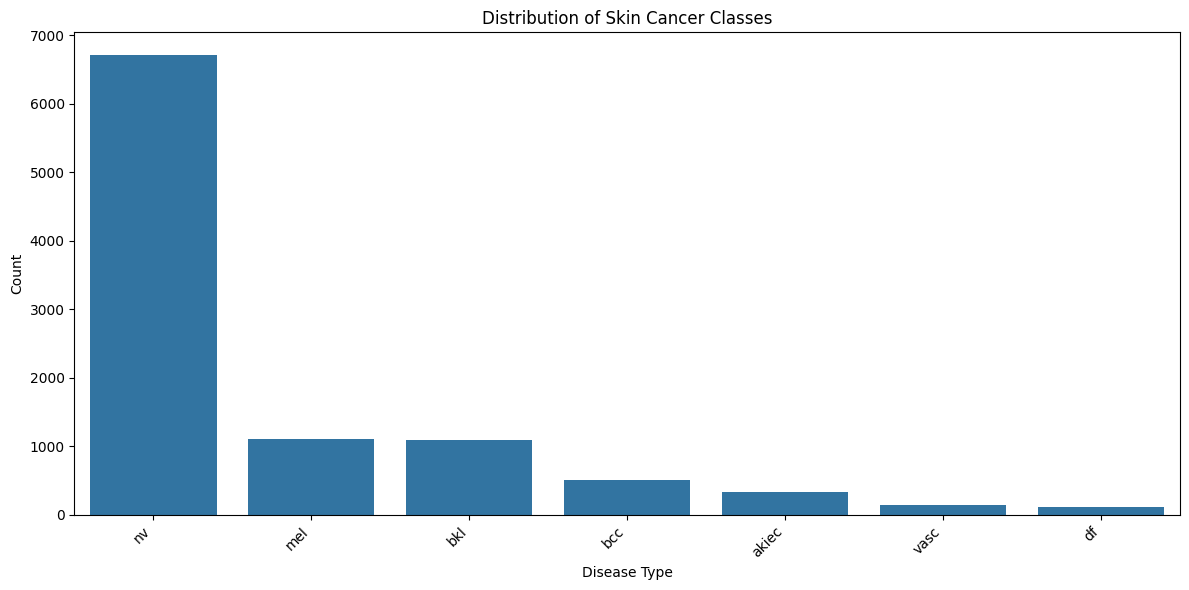


Class distribution shows a significant imbalance, especially for 'nv'.
This will need to be addressed during training using class weights.



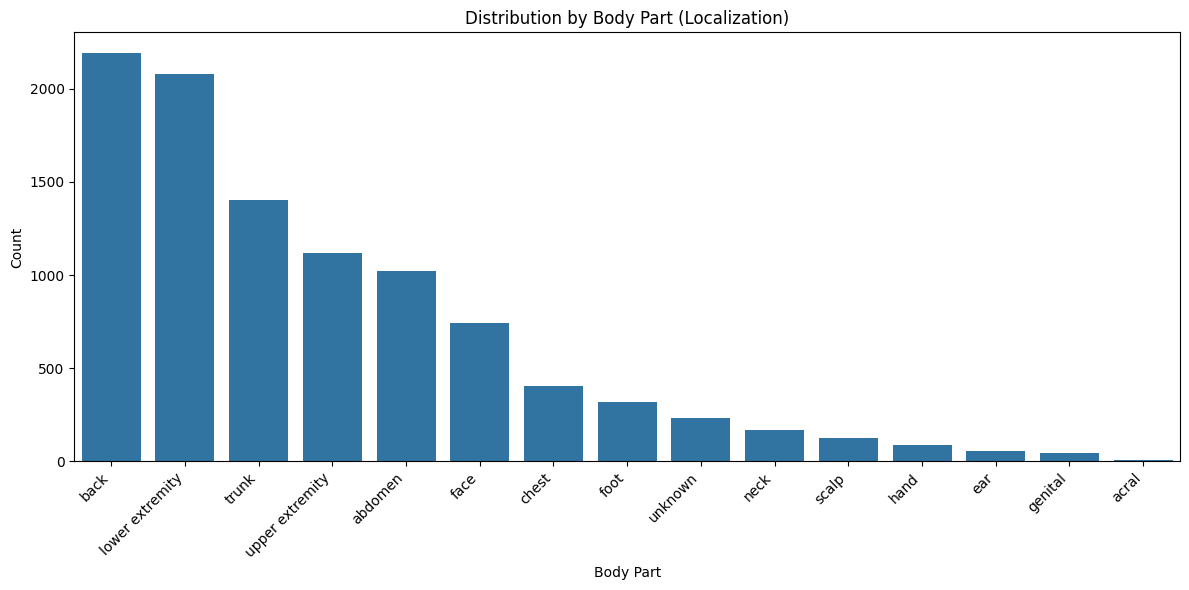

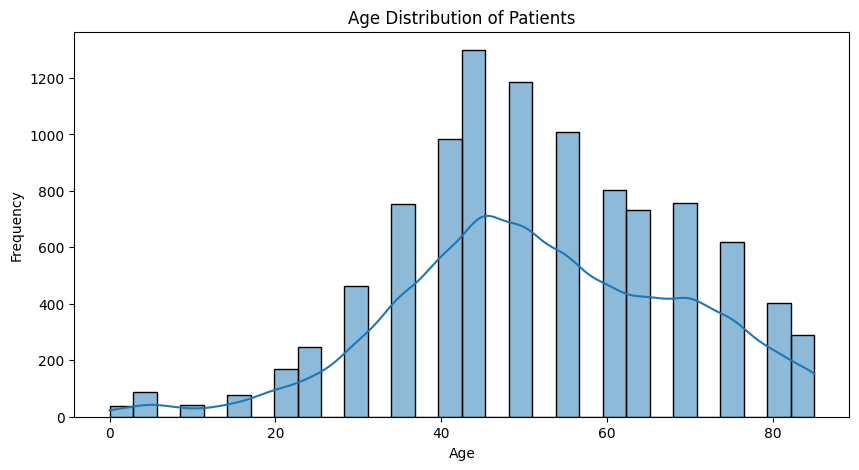

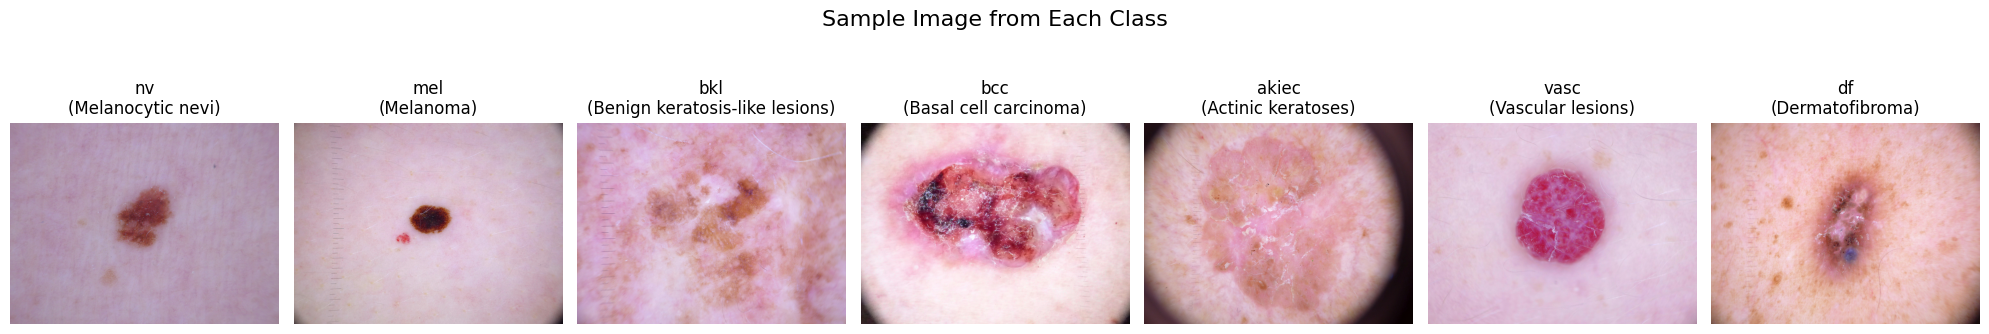

In [1]:
# In notebooks/1_EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Setup paths (you might need to adjust this depending on where you run the notebook)
import sys
sys.path.append('../')
from src.config import METADATA_PATH, IMAGE_DIR_PART1, IMAGE_DIR_PART2, CLASSES

# Load Metadata
df = pd.read_csv(METADATA_PATH)
print("Dataset Head:")
print(df.head())

# --- 1. Class Distribution ---
plt.figure(figsize=(12, 6))
sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index)
plt.title('Distribution of Skin Cancer Classes')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nClass distribution shows a significant imbalance, especially for 'nv'.")
print("This will need to be addressed during training using class weights.\n")

# --- 2. Distribution by Localization ---
plt.figure(figsize=(12, 6))
sns.countplot(x='localization', data=df, order=df['localization'].value_counts().index)
plt.title('Distribution by Body Part (Localization)')
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3. Age Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# --- 4. Visualize Sample Images ---
# Create a dictionary of image paths
image_paths = {os.path.splitext(f)[0]: os.path.join(p, f)
               for p in [IMAGE_DIR_PART1, IMAGE_DIR_PART2]
               for f in os.listdir(p)}
df['image_path'] = df['image_id'].map(image_paths.get)

# Display one image from each class
fig, axes = plt.subplots(1, len(CLASSES), figsize=(20, 4))
fig.suptitle('Sample Image from Each Class', fontsize=16)

for i, (dx, full_name) in enumerate(CLASSES.items()):
    sample_img_path = df[df['dx'] == dx]['image_path'].iloc[0]
    img = Image.open(sample_img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"{dx}\n({full_name})")
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()